In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
df = pd.read_csv("D:\\Amir Ali\\Data Science\\Udemy DataScien\\TensorFlow_FILES\\DATA\\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose() #transpose help us to describe all the columns data in rows

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\apna computer\AppData\Local\Temp\ipykernel_11328\4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

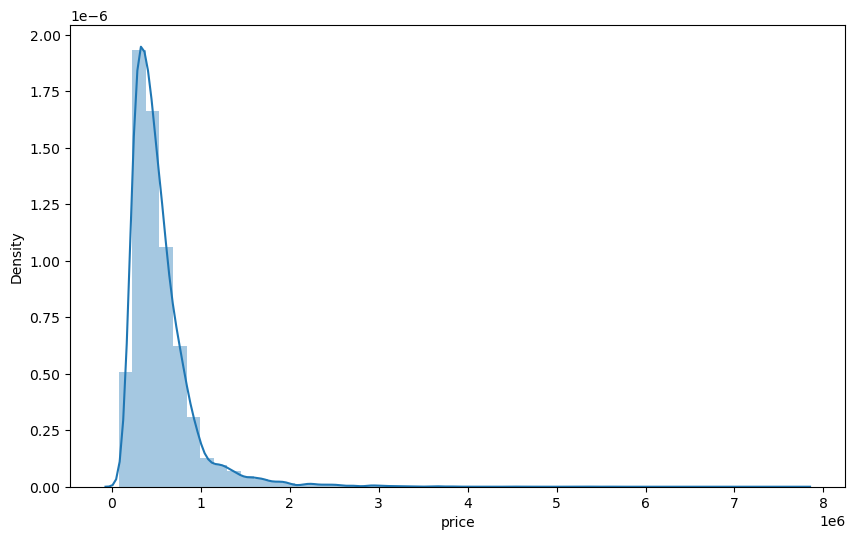

In [5]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

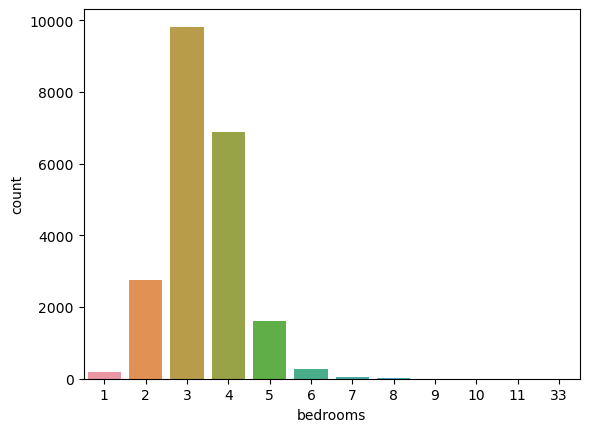

In [6]:
# plt.figure(figsize = (10,8))
sns.countplot(data=df, x=df['bedrooms'])

In [7]:
df.corr()['price'].sort_values()

C:\Users\apna computer\AppData\Local\Temp\ipykernel_11328\321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

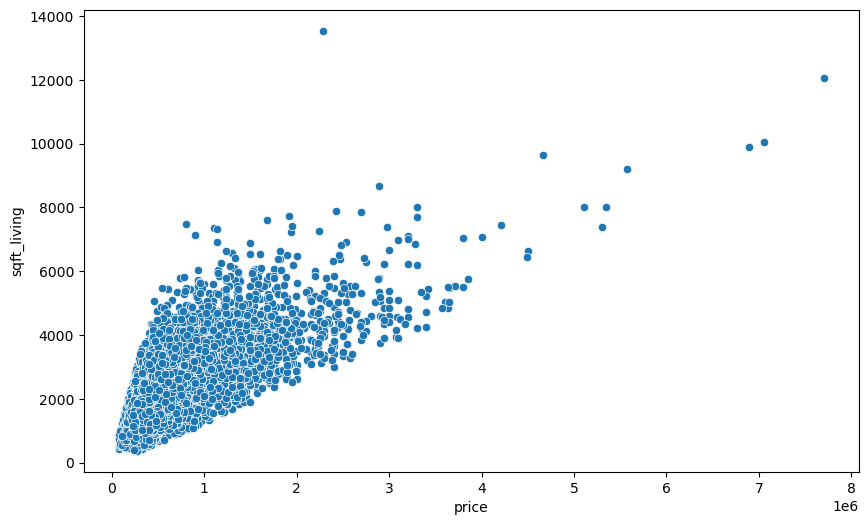

In [8]:
#lets draw a scatterplot to compare price and square feet living
plt.figure(figsize = (10,6))
sns.scatterplot(x ='price', y ='sqft_living', data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

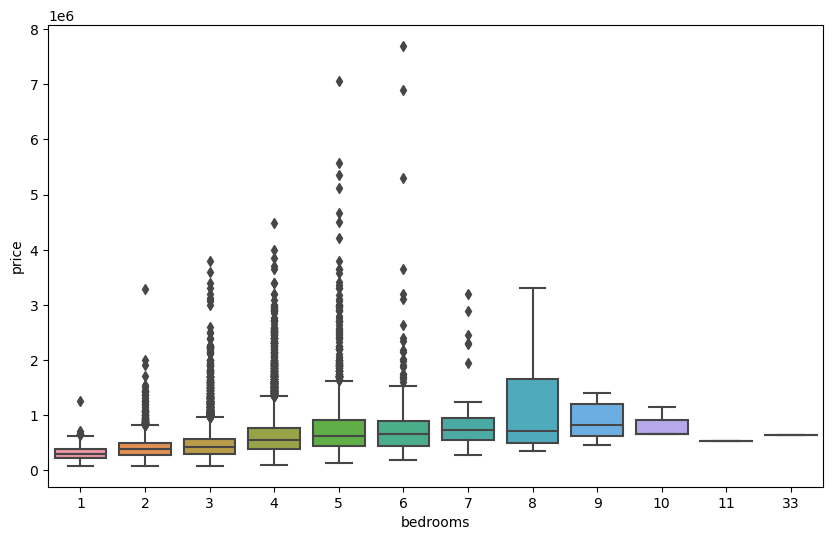

In [9]:
plt.figure(figsize = (10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

<Axes: xlabel='bathrooms', ylabel='price'>

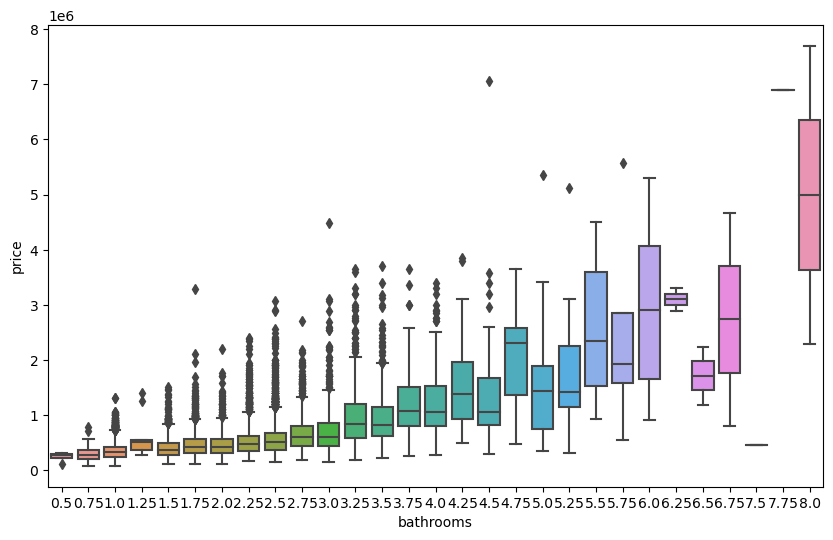

In [10]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'bathrooms', y = 'price', data = df)

<Axes: xlabel='grade', ylabel='price'>

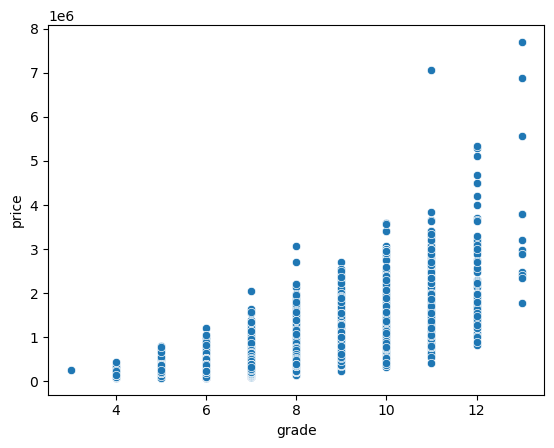

In [11]:
sns.scatterplot(x='grade', y='price', data = df)

<Axes: xlabel='price', ylabel='long'>

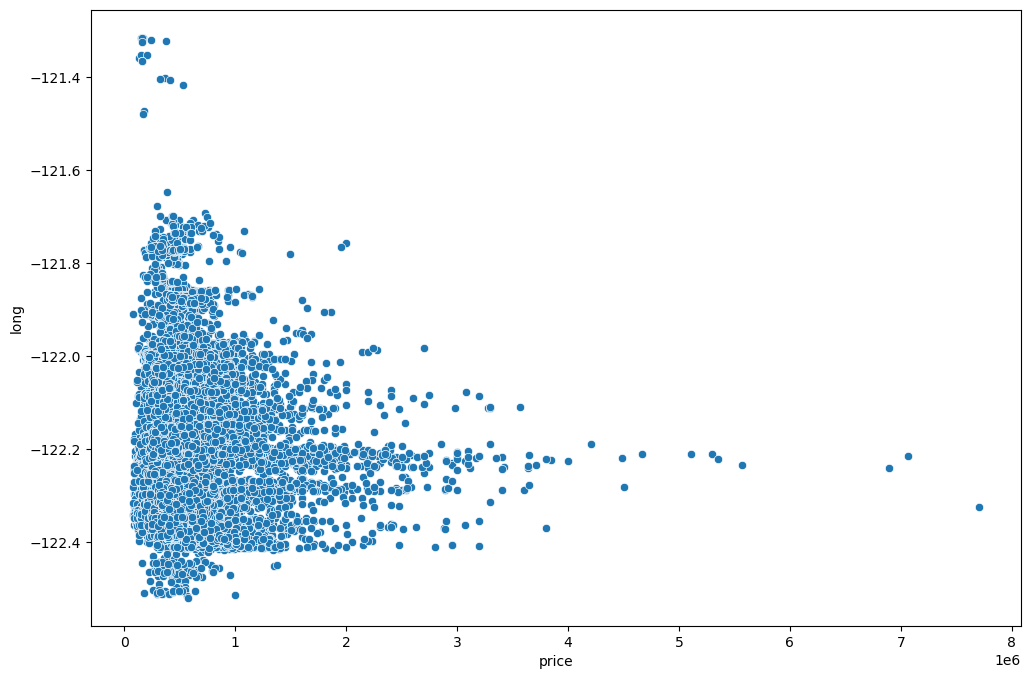

In [12]:
#long represent longitude lets try to analyse our data best on geographical presence.

plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y ='long', data = df)

<Axes: xlabel='price', ylabel='lat'>

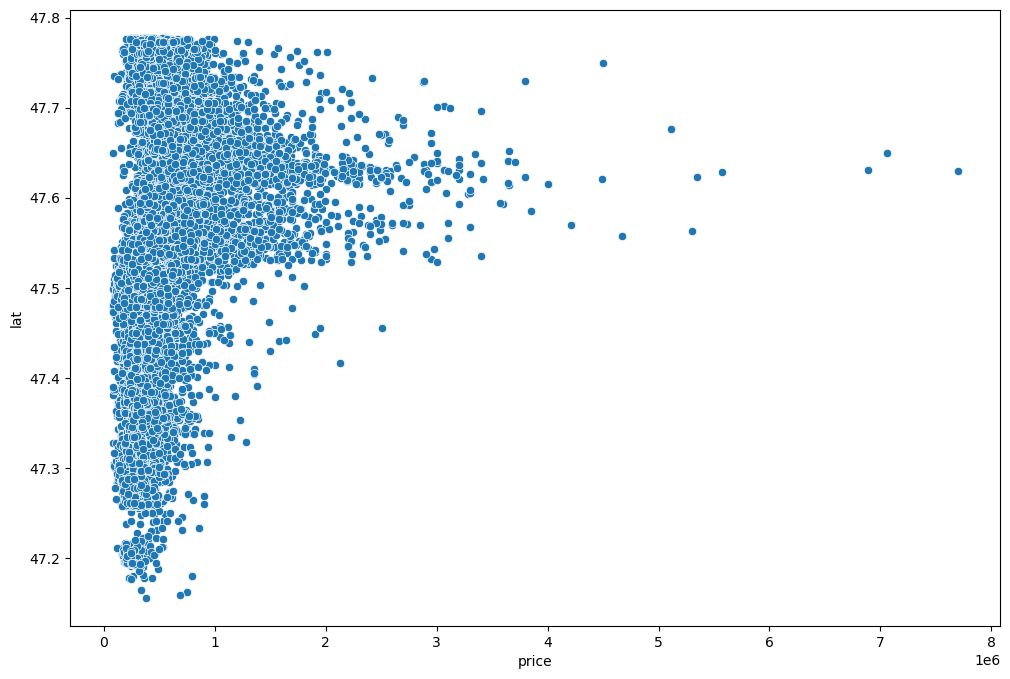

In [13]:
#lat is representing latitude let findout price relation
plt.figure(figsize = (12,8))
sns.scatterplot(x='price', y = 'lat', data = df)

<Axes: xlabel='long', ylabel='lat'>

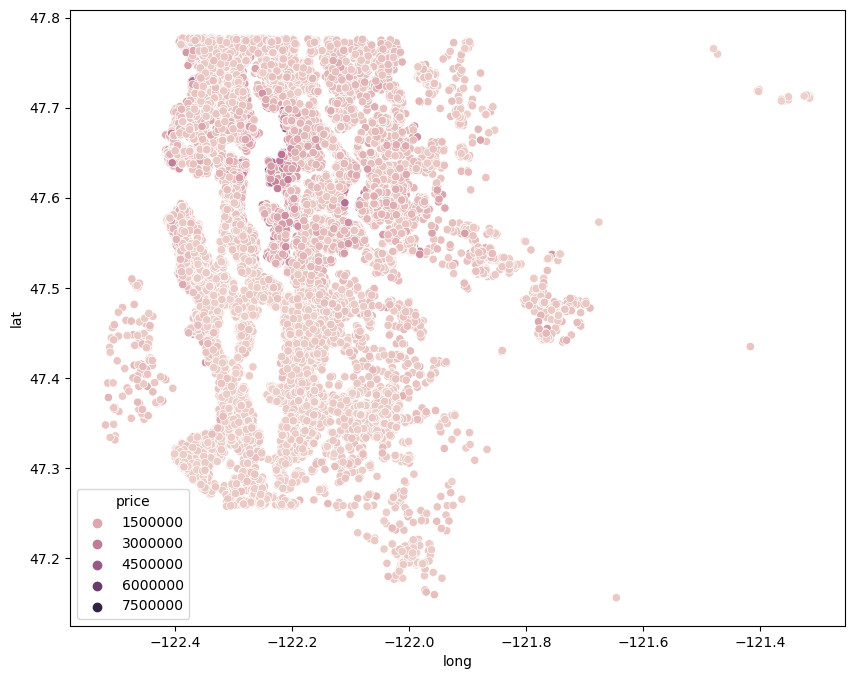

In [14]:
#lets plot longitude and latitude together in scatter plot As we know that
#Latitude is the Y axis, longitude is the X axis in real geagraphical graph.
plt.figure(figsize =(10,8))
sns.scatterplot(x='long', y='lat', data = df, hue = 'price')

#### As per our data, above plot is more or less actual graph of the area with expensive houses and the dark point represents more expensive houses

In [15]:
#Lets find top expensive houses from the dataset.

df.sort_values('price', ascending = False).head(20) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


As we can see top 20 expesives houses ranges differ from 7.7M to 3.6M and as per our 
distribution plot most of houses ranges are between 1 to 3.
We can also say only top 1% houses are outlier in our data. 

In [16]:
#lets find 1%of our data
len(df)*0.01

215.97

In [17]:
non_top1_percent = df.sort_values('price', ascending = False).iloc[216:]
#in this code we sort the price higher to lower and slice top 215 rows which were our top 1% outlier

<Axes: xlabel='long', ylabel='lat'>

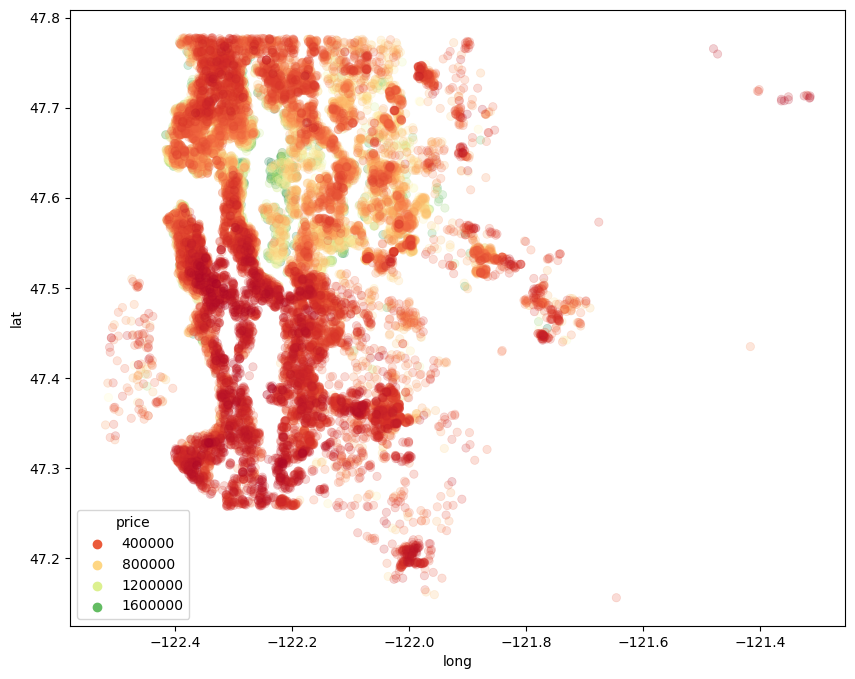

In [18]:
#lets plot the scatter plot for latitude and longtitude with this new data.
plt.figure(figsize = (10,8))
sns.scatterplot(x='long', y='lat', data = non_top1_percent, 
                edgecolor = None, alpha = 0.2, palette = 'RdYlGn', hue = 'price'
               )

There is column call waterfront it seems like at waterfront houses are more expensive than other.
lets confirm by plotting a box plot of price and waterfront

<Axes: xlabel='waterfront', ylabel='price'>

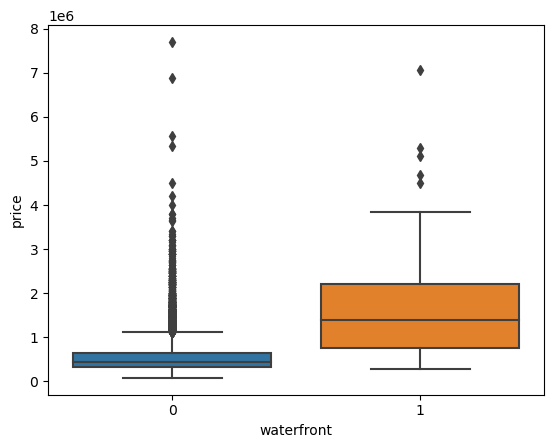

In [19]:
sns.boxplot(x='waterfront', y='price', data=df)

## Feature Engineering

In [20]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
#Id column is not useful for us lets drop this column
df = df.drop('id', axis = 1)

In [22]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [25]:
#lets extract year and month from this date column
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [26]:
df.head(2)
#we should see year and month column at the end of the datafrom

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12


<Axes: xlabel='month', ylabel='price'>

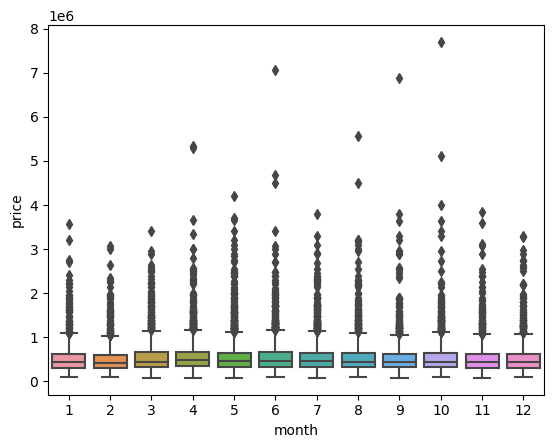

In [27]:
#lest check the distribution price in different month to check the variation
sns.boxplot(x='month', y='price', data=df)

Its tough to say anything by seeing this plot lets find out average price of each month

In [28]:
df.groupby('month').mean()['price']

C:\Users\apna computer\AppData\Local\Temp\ipykernel_11328\3851561138.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean()['price']


month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

#### lets do the same analysis with years

<Axes: xlabel='year', ylabel='price'>

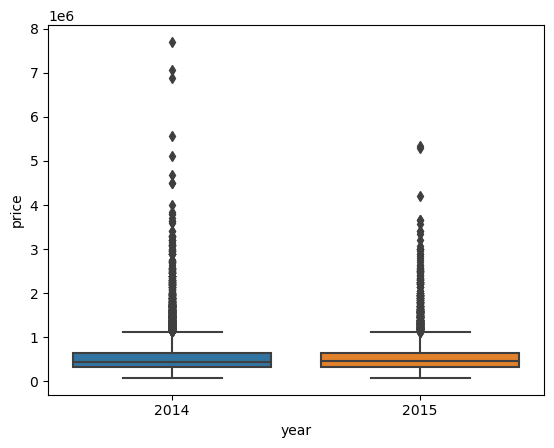

In [29]:
sns.boxplot(x='year', y='price', data = df)

C:\Users\apna computer\AppData\Local\Temp\ipykernel_11328\366114082.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean()['price'].plot()


<Axes: xlabel='year'>

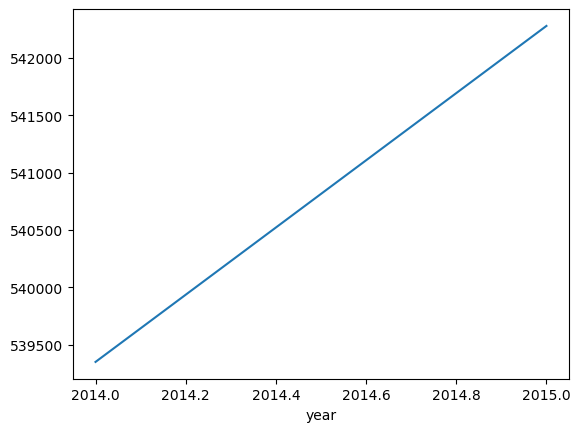

In [30]:
df.groupby('year').mean()['price'].plot()

In [31]:
# we can drop our date column as it should not be useful for us now
df = df.drop('date', axis = 1)

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [33]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10


In [34]:
df = df.drop('zipcode', axis = 1)

#### Lets sperate our feature from our label

In [35]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
import keras
import tensorflow.keras.models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
X_train.shape

(15117, 19)

In [44]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [45]:
model.fit(x=X_train, y=y_train, 
          validation_data = (X_test, y_test),
         batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 7s 16ms/step - loss: 430240235520.0000 - val_loss: 418917810176.0000
Epoch 2/400
119/119 [==============================] - 1s 9ms/step - loss: 429170163712.0000 - val_loss: 415133728768.0000
Epoch 3/400
119/119 [==============================] - 1s 9ms/step - loss: 414036721664.0000 - val_loss: 380514172928.0000
Epoch 4/400
119/119 [==============================] - 1s 9ms/step - loss: 340161658880.0000 - val_loss: 261763055616.0000
Epoch 5/400
119/119 [==============================] - 1s 9ms/step - loss: 192122454016.0000 - val_loss: 120619442176.0000
Epoch 6/400
119/119 [==============================] - 1s 9ms/step - loss: 106724818944.0000 - val_loss: 95625363456.0000
Epoch 7/400
119/119 [==============================] - 1s 9ms/step - loss: 98072698880.0000 - val_loss: 94045831168.0000
Epoch 8/400
119/119 [==============================] - 1s 9ms/step - loss: 96406659072.0000 - val_loss: 92519358464.0000
Epoch 9/400
119/119 

119/119 [==============================] - 1s 10ms/step - loss: 38897381376.0000 - val_loss: 37667192832.0000
Epoch 69/400
119/119 [==============================] - 1s 8ms/step - loss: 38731665408.0000 - val_loss: 37532344320.0000
Epoch 70/400
119/119 [==============================] - 1s 8ms/step - loss: 38635634688.0000 - val_loss: 37380497408.0000
Epoch 71/400
119/119 [==============================] - 1s 10ms/step - loss: 38446055424.0000 - val_loss: 37241954304.0000
Epoch 72/400
119/119 [==============================] - 1s 9ms/step - loss: 38272901120.0000 - val_loss: 37073641472.0000
Epoch 73/400
119/119 [==============================] - 1s 9ms/step - loss: 38133145600.0000 - val_loss: 36976246784.0000
Epoch 74/400
119/119 [==============================] - 1s 8ms/step - loss: 37957685248.0000 - val_loss: 36717559808.0000
Epoch 75/400
119/119 [==============================] - 1s 8ms/step - loss: 37783334912.0000 - val_loss: 36630401024.0000
Epoch 76/400
119/119 [=============

Epoch 135/400
119/119 [==============================] - 1s 8ms/step - loss: 33149335552.0000 - val_loss: 31717992448.0000
Epoch 136/400
119/119 [==============================] - 1s 8ms/step - loss: 33122852864.0000 - val_loss: 31694972928.0000
Epoch 137/400
119/119 [==============================] - 1s 8ms/step - loss: 33072517120.0000 - val_loss: 31643858944.0000
Epoch 138/400
119/119 [==============================] - 1s 8ms/step - loss: 33044871168.0000 - val_loss: 31707715584.0000
Epoch 139/400
119/119 [==============================] - 1s 8ms/step - loss: 33025994752.0000 - val_loss: 31583305728.0000
Epoch 140/400
119/119 [==============================] - 1s 9ms/step - loss: 32986048512.0000 - val_loss: 31545436160.0000
Epoch 141/400
119/119 [==============================] - 1s 7ms/step - loss: 32942399488.0000 - val_loss: 31491340288.0000
Epoch 142/400
119/119 [==============================] - 1s 8ms/step - loss: 32920055808.0000 - val_loss: 31452026880.0000
Epoch 143/400
11

119/119 [==============================] - 1s 8ms/step - loss: 31559405568.0000 - val_loss: 29813123072.0000
Epoch 202/400
119/119 [==============================] - 1s 7ms/step - loss: 31557390336.0000 - val_loss: 29782937600.0000
Epoch 203/400
119/119 [==============================] - 1s 8ms/step - loss: 31567343616.0000 - val_loss: 29770735616.0000
Epoch 204/400
119/119 [==============================] - 1s 8ms/step - loss: 31525058560.0000 - val_loss: 29766400000.0000
Epoch 205/400
119/119 [==============================] - 1s 8ms/step - loss: 31489654784.0000 - val_loss: 29756358656.0000
Epoch 206/400
119/119 [==============================] - 1s 7ms/step - loss: 31479627776.0000 - val_loss: 29751308288.0000
Epoch 207/400
119/119 [==============================] - 1s 7ms/step - loss: 31484882944.0000 - val_loss: 29690030080.0000
Epoch 208/400
119/119 [==============================] - 1s 8ms/step - loss: 31444830208.0000 - val_loss: 29685987328.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 1s 9ms/step - loss: 30640422912.0000 - val_loss: 28735987712.0000
Epoch 268/400
119/119 [==============================] - 1s 10ms/step - loss: 30627223552.0000 - val_loss: 28672309248.0000
Epoch 269/400
119/119 [==============================] - 1s 9ms/step - loss: 30634496000.0000 - val_loss: 28680855552.0000
Epoch 270/400
119/119 [==============================] - 1s 9ms/step - loss: 30600165376.0000 - val_loss: 28649324544.0000
Epoch 271/400
119/119 [==============================] - 1s 9ms/step - loss: 30592874496.0000 - val_loss: 28643002368.0000
Epoch 272/400
119/119 [==============================] - 1s 10ms/step - loss: 30586992640.0000 - val_loss: 28611426304.0000
Epoch 273/400
119/119 [==============================] - 1s 9ms/step - loss: 30562215936.0000 - val_loss: 28634722304.0000
Epoch 274/400
119/119 [==============================] - 1s 9ms/step - loss: 30549995520.0000 - val_loss: 28596920320.0000
Epoch 275/400
119/119 [=====

119/119 [==============================] - 1s 10ms/step - loss: 29714358272.0000 - val_loss: 27667087360.0000
Epoch 334/400
119/119 [==============================] - 1s 9ms/step - loss: 29713840128.0000 - val_loss: 27602966528.0000
Epoch 335/400
119/119 [==============================] - 1s 9ms/step - loss: 29709660160.0000 - val_loss: 27629486080.0000
Epoch 336/400
119/119 [==============================] - 1s 9ms/step - loss: 29659348992.0000 - val_loss: 27682502656.0000
Epoch 337/400
119/119 [==============================] - 1s 9ms/step - loss: 29668669440.0000 - val_loss: 27537631232.0000
Epoch 338/400
119/119 [==============================] - 1s 9ms/step - loss: 29623748608.0000 - val_loss: 27512842240.0000
Epoch 339/400
119/119 [==============================] - 1s 10ms/step - loss: 29616054272.0000 - val_loss: 27478759424.0000
Epoch 340/400
119/119 [==============================] - 1s 11ms/step - loss: 29578022912.0000 - val_loss: 27472855040.0000
Epoch 341/400
119/119 [====

119/119 [==============================] - 1s 9ms/step - loss: 28703148032.0000 - val_loss: 26352922624.0000
Epoch 400/400
119/119 [==============================] - 1s 9ms/step - loss: 28670507008.0000 - val_loss: 26329901056.0000


In [46]:
#lets create losses model history dataframe
losses = pd.DataFrame(model.history.history)

<Axes: >

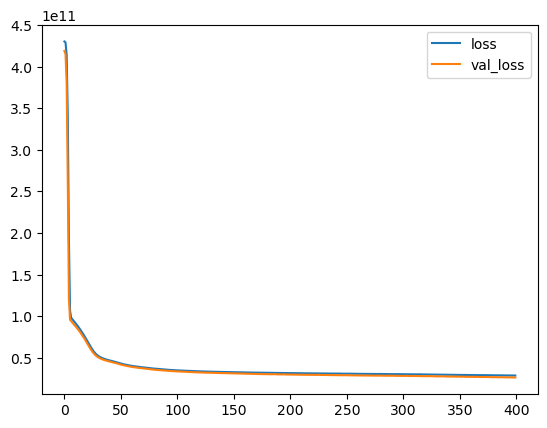

In [47]:
losses.plot() #lets visulaize

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [49]:
prediction = model.predict(X_test)

203/203 [==============================] - 2s 5ms/step


In [50]:
mean_squared_error(y_test, prediction)

26329900346.180634

In [51]:
np.sqrt(mean_squared_error(y_test, prediction))

162264.9079320006

In [52]:
mean_absolute_error(y_test, prediction)

100104.18520326968

In [53]:
explained_variance_score(y_test, prediction)

0.801585359173991

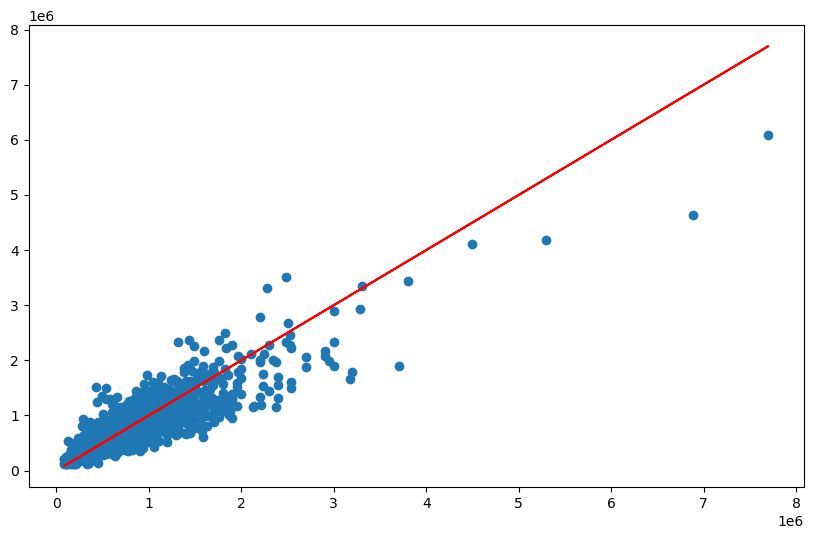

In [54]:
plt.figure(figsize = (10,6))
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

In [55]:
single_house = df.drop ('price', axis = 1).iloc[0]

In [60]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [61]:
model.predict(single_house)

1/1 [==============================] - 0s 82ms/step


array([[280005.8]], dtype=float32)

In [62]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


We kind of done here but for more we can again try to drop 1% of the outlier

### It was greate learning thanks to Udemy and Jose Portilla!!